# Introduction
My goal in this Exploratory Data Analysis (EDA) is to try to respond to some questions, about the Cyclones and World Bank Indicators dataset. @Xavier did an amazing job including the EDA and Data Preparation, so please also check what Xavier did[ here.](https://github.com/omdena/wfpdisrel/blob/master/%23task4-eda/EDA_Versions/0_EDA%20and%20data%20preparation.ipynb)



## EDA


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [0]:
plt.style.use('seaborn-colorblind')

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/OUTPUT_WBI_cyclones_merged.csv', sep =';')

In [29]:
df.head()

,ID,NAME,ISO,Year,COORDS,BASIN,SUBBASIN,NATURE,ISO_TIME,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,Total Affected
0,1,DELLA,JPN,1949,"[[31.99, 130.68], [33.52, 130.97], [41.0, 140....",WP,WP,ET,"['1949-06-20 15:00:00', '1949-06-20 18:00:00',...",12,0,12,-1,986.375000,21.50,40.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,Low,194046
1,2,JANE,JPN,1950,"[[34.94, 135.48], [36.1, 136.09], [37.27, 136....",WP,WP,TS,"['1950-09-03 03:00:00', '1950-09-03 06:00:00',...",21,0,21,0,973.500000,27.00,31.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,Low,642117
2,3,CHARLIE,JAM,1951,"[[17.9, -76.9], [18.1, -77.8]]",NAm,NAm,TS,"['1951-08-18 03:00:00', '1951-08-18 06:00:00']",3,0,3,2,974.500000,16.50,284.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,56000.0,10.175534,NaN,0.100541,868.3,69.93,NaN,3796.219401,0.0,64.770000,NaN,152.453647,2.578304,66.231,Low,20200
3,4,AMY,PHL,1951,"[[10.73, 124.8], [10.53, 123.17], [10.68, 119....",WP,WP,TS,"['1951-12-09 12:00:00', '1951-12-09 21:00:00',...",12,0,12,2,961.333333,9.00,270.666667,119.200,20464826.0,1.880280e+11,12675908.0,1.131050e+11,5618193.0,4.897333e+10,NaN,10.175534,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,Low_Middle,60000
4,5,EMMA,PHL,1952,"[[10.47, 123.87], [10.65, 123.24], [10.83, 122...",WP,WP,TS,"['1952-07-02 12:00:00', '1952-07-02 15:00:00',...",9,8,1,0,983.500000,12.25,288.500000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,Low_Middle,103


In [30]:
df.columns

Index(['ID', 'NAME', 'ISO', 'Year', 'COORDS', 'BASIN', 'SUBBASIN', 'NATURE',
       'ISO_TIME', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS', 'USA_SSHS',
       'PRES_CALC_mean', 'STORM_SPD_mean', 'STORM_DR_mean', 'v_land_kn',
       '34kn_pop', '34kn_assets', '64kn_pop', '64kn_assets', '96kn_pop',
       '96kn_assets', 'Total damage ('000$)', 'CPI',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Rural population (% of total population)', 'Income_level_Final',
       'Total Affected'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   ID                                                   1091 non-null   int64  
 1   NAME                                                 1090 non-null   object 
 2   ISO                                                  1091 non-null   object 
 3   Year                                                 1091 non-null   int64  
 4   COORDS                                               1091 non-null   object 
 5   BASIN                                                1091 non-null   object 
 6   SUBBASIN                                             1071 non-null   object 
 7   NATURE                                               1091 non-null   object 
 8   ISO_TIME                                             1091 non-null  

In [32]:
df.describe()

,ID,Year,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Total Affected
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1081.000000,1091.000000,1091.000000,968.000000,8.260000e+02,8.260000e+02,8.260000e+02,8.260000e+02,8.260000e+02,8.260000e+02,7.530000e+02,1091.000000,913.000000,1090.000000,1081.000000,1087.000000,1046.000000,1082.000000,1.091000e+03,1087.000000,1080.000000,1091.000000,1081.000000,1091.000000,1.091000e+03
mean,546.000000,1998.997250,9.954170,2.241063,7.713107,0.213566,979.622669,12.486379,215.655238,90.075858,1.644191e+07,8.194515e+11,4.907059e+06,2.698263e+11,8.935271e+05,4.171655e+10,1.247420e+06,66.348247,4249.770384,0.190618,3428.855421,93.660379,4.554685,9666.419836,2.172442e+07,70.269232,41.204507,304.955756,3.211452,48.298564,6.204305e+05
std,315.088876,14.774047,7.398345,3.686524,7.714588,1.696526,19.715195,7.056005,98.800340,30.566110,1.965917e+07,1.657080e+12,8.492624e+06,6.815067e+11,2.837815e+06,1.678349e+11,7.138371e+06,24.916009,8414.393396,0.354965,1719.892844,30.812734,4.247669,14842.653413,2.670540e+07,7.425263,47.369415,973.388478,1.817629,22.114308,2.040746e+06
min,1.000000,1949.000000,0.000000,0.000000,-1.000000,-5.000000,903.125000,1.100000,0.000000,30.000000,1.065000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,9.327572,0.000000,0.000425,393.300000,17.390000,-16.995075,168.663976,-7.000000e+04,41.762000,0.000000,1.786314,0.538881,0.000000,2.000000e+00
25%,273.500000,1989.500000,3.000000,0.000000,1.000000,-1.000000,967.833333,7.902381,146.757576,64.375000,1.883735e+06,1.540869e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.450000e+04,49.798080,95.599998,0.059842,1967.400000,72.180000,2.204688,1412.947077,1.034133e+06,66.473500,0.002186,48.136706,1.840000,24.933000,3.302000e+03
50%,546.000000,2003.000000,9.000000,0.000000,5.000000,0.000000,983.958333,11.000000,263.000000,90.000000,8.201232e+06,1.019085e+11,7.888665e+05,8.602480e+09,0.000000e+00,0.000000e+00,7.770000e+04,71.955007,405.420430,0.092525,3219.100000,97.420000,4.488243,2605.493599,1.313000e+07,70.737000,22.326908,143.871390,2.757732,53.716000,3.046300e+04
75%,818.500000,2011.000000,18.000000,3.000000,15.000000,1.000000,995.000000,15.000000,289.350877,114.125000,2.314518e+07,5.379250e+11,6.993792e+06,1.091272e+11,2.895762e+05,4.923605e+09,4.000000e+05,87.984603,3900.080000,0.192161,4843.200000,113.990000,6.884055,8588.331583,3.190500e+07,75.056659,81.791197,292.687045,4.188538,65.970000,2.725000e+05
max,1091.000000,2019.000000,23.000000,12.000000,23.000000,5.000000,1013.000000,53.000000,358.000000,171.800000,1.186283e+08,9.763580e+12,6.057264e+07,4.629470e+12,3.672847e+07,1.565620e+12,1.250000e+08,100.000000,42985.295220,3.069373,8900.000000,223.020000,19.300000,86150.462210,1.837500e+08,84.680488,328.790446,20479.769990,14.010000,92.421000,2.962200e+07


In [33]:
print(f'Our dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataset contains 1091 rows and 39 columns.


In [34]:
pd.DataFrame({'Data Types': df.dtypes, 'Missing Values':df.isnull().sum(), 'Missing Values Percentage': (df.isnull().sum() / df.shape[0]) * 100})

,Data Types,Missing Values,Missing Values Percentage
ID,int64,0,0.000000
NAME,object,1,0.091659
ISO,object,0,0.000000
Year,int64,0,0.000000
COORDS,object,0,0.000000
BASIN,object,0,0.000000
SUBBASIN,object,20,1.833181
NATURE,object,0,0.000000
ISO_TIME,object,0,0.000000
TOTAL_HRS,int64,0,0.000000


We can see that the following Columns: v_land_kn, 34kn_pop, 34kn_assets, 64kn_pop, 64kn_assets. 96kn_pop, 96kn_assets, Total_Damage and Air Transport are the columns with the highest percentage of missing values.


In [35]:
category_columns =  df.dtypes[df.dtypes == 'object'].index
category_columns

Index(['NAME', 'ISO', 'COORDS', 'BASIN', 'SUBBASIN', 'NATURE', 'ISO_TIME',
       'Income_level_Final'],
      dtype='object')

So, these following columns: Name, ISO, Coords, Basin, Subbasin, Nature, ISO_TIME, Income_level_Final.
If we check the Documentation we can find Basin Columns explain the basins where occurs the formation of the cyclones, so first at all. Let's see where the basins where the cyclones occur more.


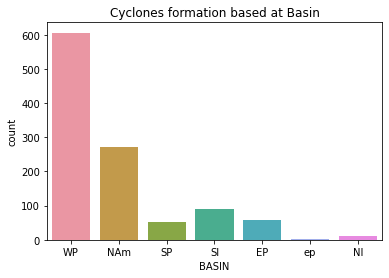

In [36]:
sns.countplot(df['BASIN'])
plt.title("Cyclones formation based at Basin")
plt.show()

So, we can see that WP (Western North Pacific) it is the basin where the most Cyclones formations occur. So probably the Cyclones at WP basin are the most significant total affected people and Damage.
So let's check out.


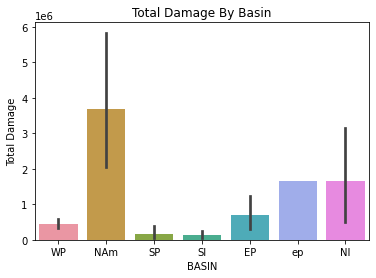

In [37]:
sns.barplot(x = 'BASIN', y = "Total damage (\'000$)", data = df)
plt.title('Total Damage By Basin')
plt.ylabel('Total Damage')
plt.show()

So our theory above, doesn't fit in relation about this graph.
We know that NAm basis had the most Total Damage, so let's checkout whats are the Countries at NAm basis.

In [38]:
df[df['BASIN'] == 'NAm']

,ID,NAME,ISO,Year,COORDS,BASIN,SUBBASIN,NATURE,ISO_TIME,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,Total Affected
2,3,CHARLIE,JAM,1951,"[[17.9, -76.9], [18.1, -77.8]]",NAm,NAm,TS,"['1951-08-18 03:00:00', '1951-08-18 06:00:00']",3,0,3,2,974.500000,16.500000,284.500000,132.4,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,56000.0,10.175534,NaN,0.100541,868.300000,69.930000,NaN,3796.219401,0.000000e+00,64.770000,NaN,152.453647,2.578304,66.231,Low,20200
5,6,HAZEL,HTI,1954,"[[18.3, -74.2], [18.6, -74.0], [19.6, -73.4], ...",NAm,NAm,TS,"['1954-10-12 09:00:00', '1954-10-12 12:00:00',...",18,0,18,2,974.250000,6.500000,29.500000,117.0,10396164.0,2.167678e+10,3570247.0,7.214210e+09,1234448.0,2.202892e+09,NaN,10.527764,NaN,0.228314,1031.000000,63.290000,NaN,993.246656,0.000000e+00,41.762000,NaN,143.031350,1.284442,84.407,Low_Middle,250000
6,7,HILDA,MEX,1955,"[[19.7, -87.7], [19.75, -87.87], [19.9, -88.4]...",NAm,NAm,TS,"['1955-09-16 14:00:00', '1955-09-16 15:00:00',...",13,0,13,0,968.888889,7.642857,270.428571,119.1,8356553.0,1.323480e+11,3436347.0,5.170777e+10,1092040.0,1.348510e+10,NaN,10.473000,NaN,0.500615,1104.900000,23.690000,NaN,3907.493801,0.000000e+00,57.077000,NaN,20.044783,3.003239,49.247,Low,11432
11,12,CLEO,HTI,1964,"[[18.12, -73.87]]",NAm,NAm,TS,['1964-08-24 21:00:00'],0,0,0,4,961.000000,15.000000,293.000000,145.2,9363761.0,2.013362e+10,5096286.0,9.160848e+09,2117798.0,4.177158e+09,10000.0,12.132117,NaN,0.215433,1056.600000,68.340000,-1.647357,928.839495,0.000000e+00,43.414000,0.000000,151.583345,1.284442,82.832,Low_Middle,80000
18,19,INEZ,CUB,1966,"[[20.01, -75.86], [20.2, -76.3], [20.36, -76.6...",NAm,NAm,TS,"['1966-09-30 15:00:00', '1966-09-30 18:00:00',...",12,0,12,1,992.444444,8.000000,274.666667,115.4,10646928.0,9.297531e+10,5856553.0,5.195270e+10,1147384.0,7.821562e+09,18000.0,12.696028,NaN,0.191116,1178.600000,83.290000,NaN,2249.749109,0.000000e+00,67.573000,0.000000,75.563194,6.445202,40.477,Low_Middle,174030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1074,MICHAEL,CUB,2018,"[[21.28, -85.06], [21.7, -85.1], [22.19, -85.1...",NAm,GM,TS,"['2018-10-08 15:00:00', '2018-10-08 18:00:00',...",15,0,15,1,975.428571,9.428571,248.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.219991,17.759927,0.266473,2920.146037,107.889793,2.248480,6816.896809,2.800272e+06,78.584212,47.391537,108.999596,13.010000,22.963,High_Middle,540
1084,1085,FIFI:ORLENE,BLZ,1974,"[[16.3, -88.2], [16.51, -88.65]]",NAm,CS,TS,"['1974-09-19 18:00:00', '1974-09-19 21:00:00']",3,2,1,1,NaN,9.500000,293.000000,107.0,303797.0,2.859383e+09,139872.0,1.651263e+09,21663.0,2.931046e+08,4000.0,19.286874,NaN,0.312245,1313.200000,31.510000,13.559985,1680.412806,2.400000e+05,67.354000,0.000000,5.756554,4.182590,49.671,Low_Middle,70000
1085,1086,FIFI:ORLENE,HND,1974,"[[16.3, -83.5], [16.31, -84.11], [16.3, -84.7]...",NAm,CS,TS,"['1974-09-18 12:00:00', '1974-09-18 15:00:00',...",21,0,21,2,974.083333,9.384615,269.846154,111.9,4100169.0,3.409681e+10,1756946.0,1.160960e+10,12285.0,9.398502e+07,540000.0,19.286874,3.000000,0.452400,1215.300000,49.310000,-1.227642,1363.030448,2.400000e+06,55.124000,0.000000,27.341487,2.939081,68.429,Low_Middle,600000
1087,1088,JOAN:MIRIAM,COL,1988,"[[11.96, -71.66], [11.9, -72.1], [11.84, -72.5...",NAm

So, NAm is more specific in North America and Caribbean part that has more Total Damage than other regions, also this region had more outliers than the other Basin areas.
Now let's look at the Total Affected column, and see where are the regions with more affected on people.


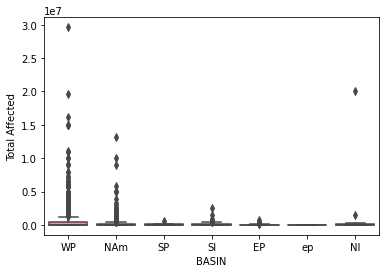

In [39]:
sns.boxplot(x = 'BASIN', y = 'Total Affected', data = df)
plt.show()

So, we back at Western Pacific (WP) at the total Affected, we also can look they had also more outliers.
So why WP and NAm have more impacts at total Affected and Total Damage and Eastern North (EP)Pacific, Southern Pacific (SP) had less impact than these other regions.
So first let checkout the correlations at these variables.


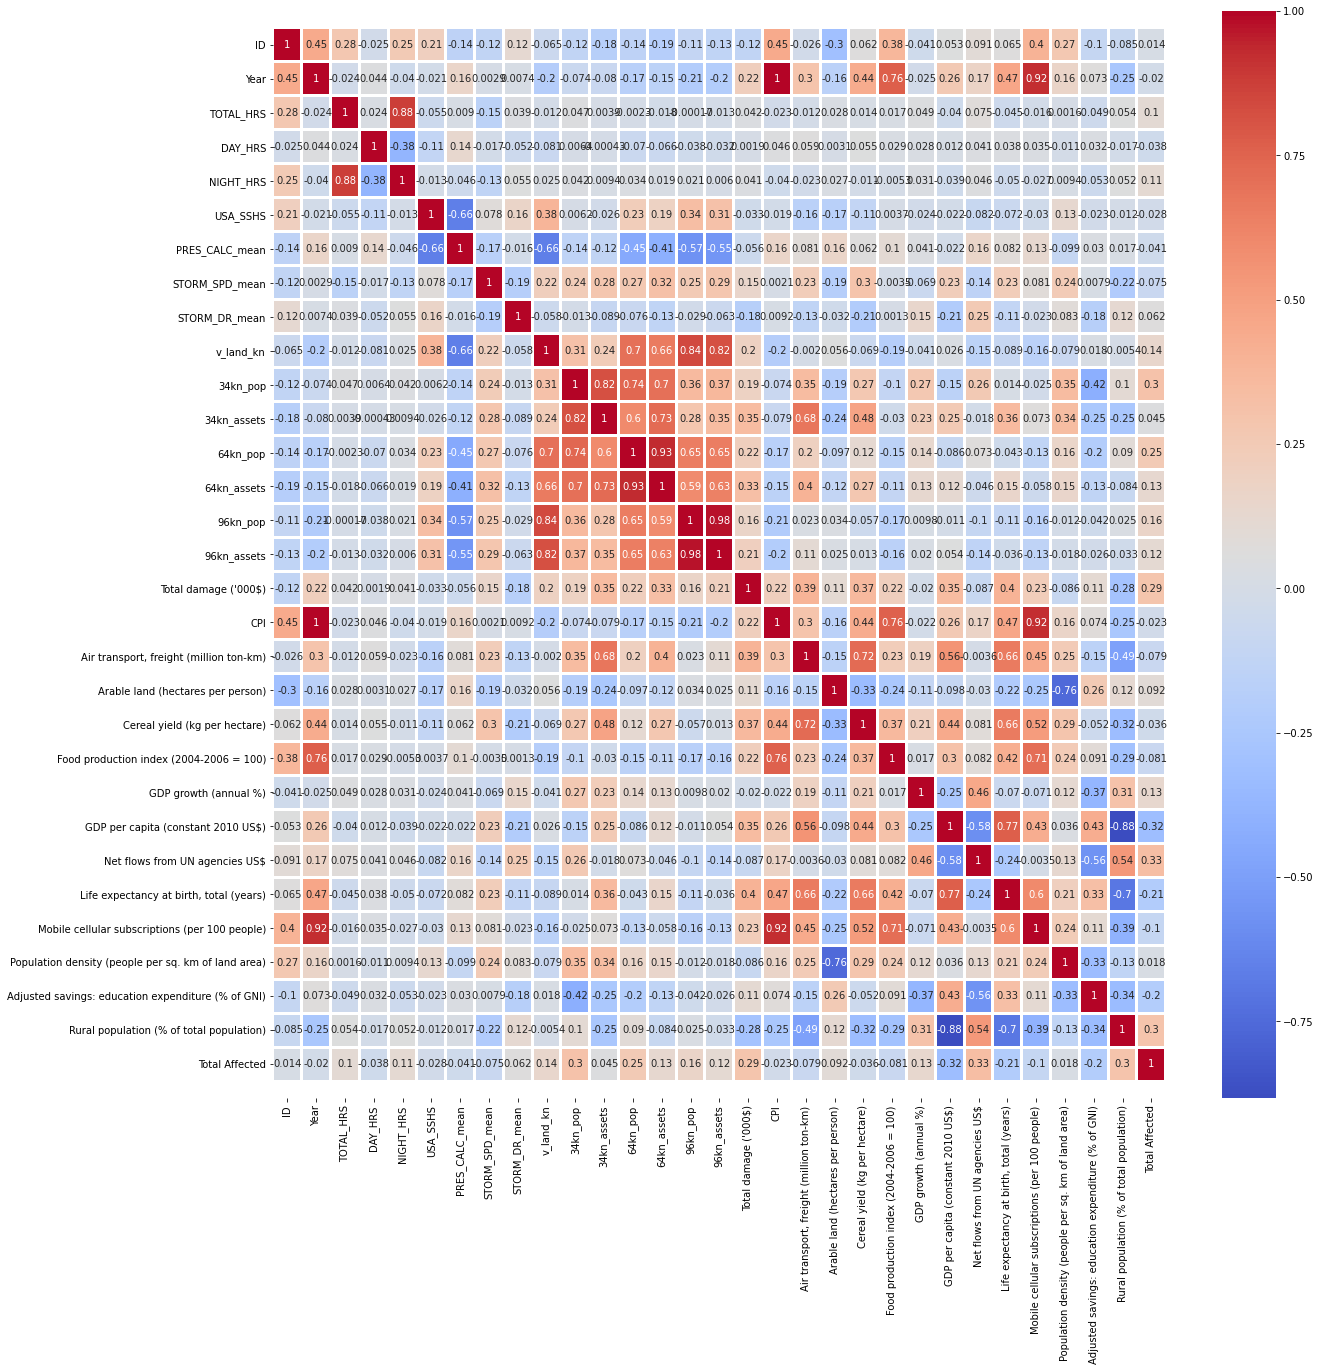

(31.5, -0.5)

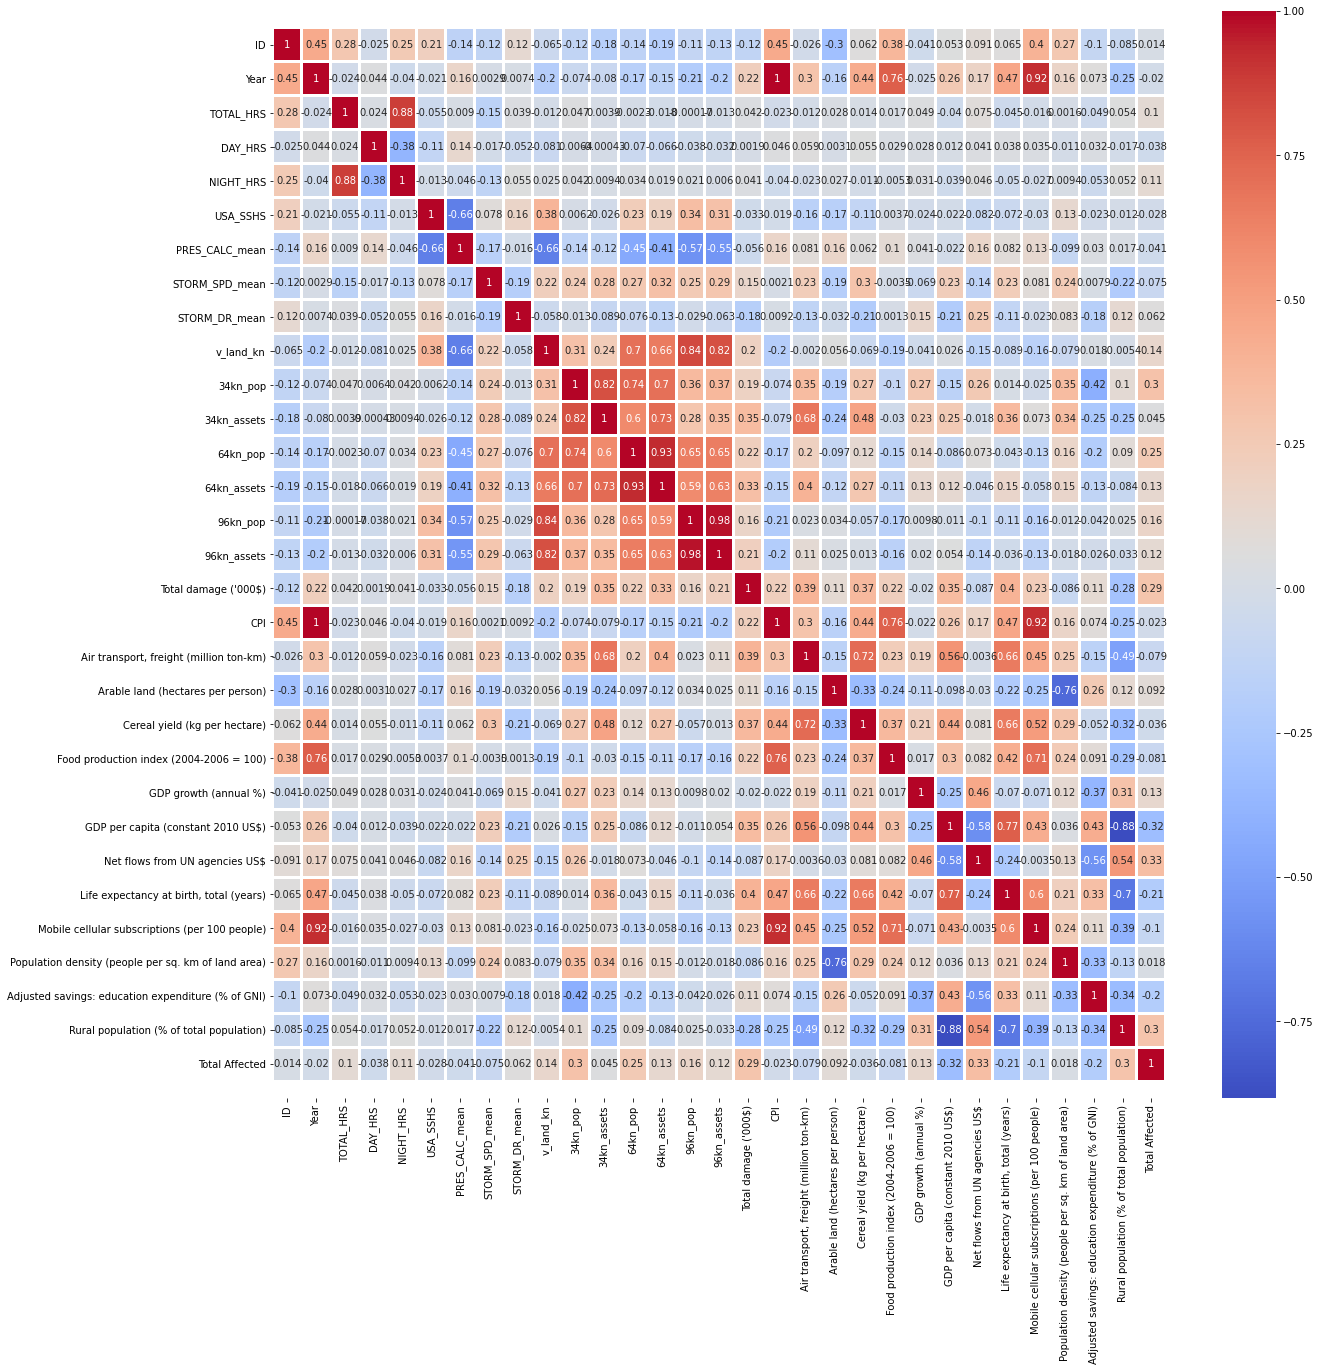

In [40]:
plt.figure(figsize = (20,20))
correlations = df.corr(method = 'spearman')
ax = plt.subplot(111)
sns.heatmap(correlations, linewidths= 2, annot = True, cmap = 'coolwarm', ax = ax)
bottom, top = ax.get_ylim()             # this fixes a bug where first and last columns were not visualized correctly
ax.set_ylim(bottom + 0.5, top - 0.5)

Total Damage has correlations at the windspeed, 34 knots till 96 knots including the population and assets, also the Cereal Yield, Probably because they lost their production, GDP per capita, Mobile.
 
Total Affected Column, Wind speed pop and assets columns, Total Damage, Net flows, and Rural Population.
 
We will check this further, for now, I have one question, it is  Countries with more Mobile subscriptions, and Air transport had less impact on the total Affected column?


In [41]:
df['Mobile cellular subscriptions (per 100 people)'].value_counts()

0.000000      254
98.555766      10
0.252128        9
110.757701      9
29.562142       9
             ... 
1.405119        1
0.017182        1
0.024600        1
1.252280        1
36.459211       1
Name: Mobile cellular subscriptions (per 100 people), Length: 403, dtype: int64

0.000000      254
98.555766      10
0.252128        9
110.757701      9
29.562142       9
             ... 
1.405119        1
0.017182        1
0.024600        1
1.252280        1
36.459211       1
Name: Mobile cellular subscriptions (per 100 people), Length: 403, dtype: int64

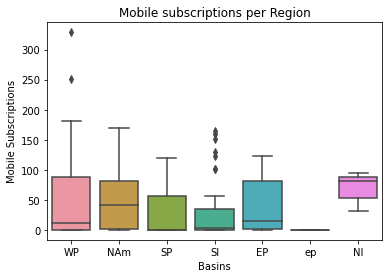

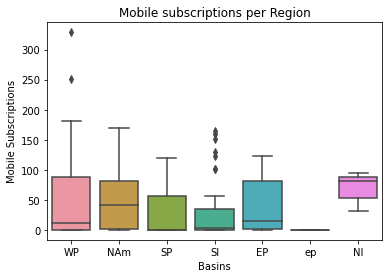

In [42]:
sns.boxplot(x = df['BASIN'],y = df['Mobile cellular subscriptions (per 100 people)'])
plt.title('Mobile subscriptions per Region')
plt.xlabel('Basins')
plt.ylabel("Mobile Subscriptions")
plt.show()

We can see that Western Pacific, otherwise NI (North Indian) had a more condensed boxplot with the average of people approximate on 100 people. Now, let’s look again and compare it with the total Damage.

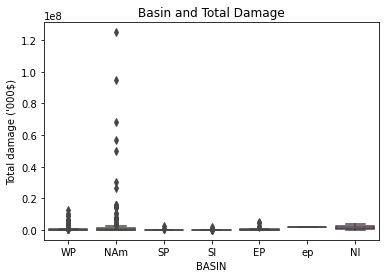

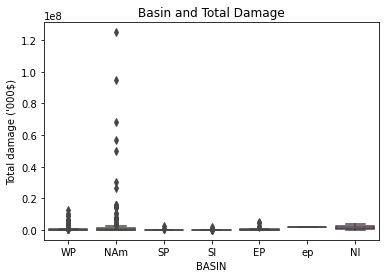

In [43]:
sns.boxplot(x = 'BASIN', y = "Total damage ('000$)", data = df)
plt.title('Basin and Total Damage')
plt.show()


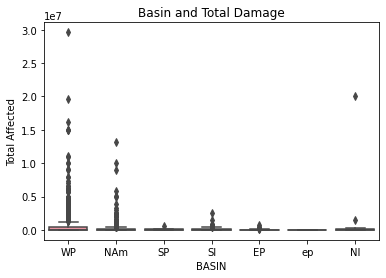

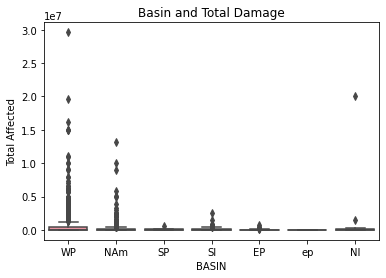

In [44]:
sns.boxplot(x = df['BASIN'], y = df["Total Affected"], data = df)
plt.title('Basin and Total Damage')
plt.show()


 
Thus, we can see that northern India has left people impacted by the cyclones, and perhaps more people have more access to telephones, firefighters, police can help these people or notify about events.
 
 
So, let's check out about the Airtransport conditions, and conclude if a Country has less air transport condition more are the impact, on fatalities and economic.
 
Note:
* Air transport had 17% of their data null values, so we may have an offer our the plot.
 
 




In [45]:
missing_airtransport = df[df['Air transport, freight (million ton-km)'].isnull()]

missing_airtransport

,ID,NAME,ISO,Year,COORDS,BASIN,SUBBASIN,NATURE,ISO_TIME,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,Total Affected
0,1,DELLA,JPN,1949,"[[31.99, 130.68], [33.52, 130.97], [41.0, 140....",WP,WP,ET,"['1949-06-20 15:00:00', '1949-06-20 18:00:00',...",12,0,12,-1,986.375000,21.500000,40.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,0.059615,4173.500000,67.790000,NaN,8607.657082,0.00000,67.666098,NaN,258.911917,2.867878,36.728000,Low,194046
1,2,JANE,JPN,1950,"[[34.94, 135.48], [36.1, 136.09], [37.27, 136....",WP,WP,TS,"['1950-09-03 03:00:00', '1950-09-03 06:00:00',...",21,0,21,0,973.500000,27.000000,31.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,0.059615,4173.500000,67.790000,NaN,8607.657082,0.00000,67.666098,NaN,258.911917,2.867878,36.728000,Low,642117
2,3,CHARLIE,JAM,1951,"[[17.9, -76.9], [18.1, -77.8]]",NAm,NAm,TS,"['1951-08-18 03:00:00', '1951-08-18 06:00:00']",3,0,3,2,974.500000,16.500000,284.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,56000.0,10.175534,NaN,0.100541,868.300000,69.930000,NaN,3796.219401,0.00000,64.770000,NaN,152.453647,2.578304,66.231000,Low,20200
3,4,AMY,PHL,1951,"[[10.73, 124.8], [10.53, 123.17], [10.68, 119....",WP,WP,TS,"['1951-12-09 12:00:00', '1951-12-09 21:00:00',...",12,0,12,2,961.333333,9.000000,270.666667,119.200,20464826.0,1.880280e+11,12675908.0,1.131050e+11,5618193.0,4.897333e+10,NaN,10.175534,NaN,0.180442,996.300000,25.680000,NaN,1059.467412,0.00000,61.105000,NaN,91.065000,2.757732,69.703000,Low_Middle,60000
4,5,EMMA,PHL,1952,"[[10.47, 123.87], [10.65, 123.24], [10.83, 122...",WP,WP,TS,"['1952-07-02 12:00:00', '1952-07-02 15:00:00',...",9,8,1,0,983.500000,12.250000,288.500000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,0.180442,996.300000,25.680000,NaN,1059.467412,0.00000,61.105000,NaN,91.065000,2.757732,69.703000,Low_Middle,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,FANI,IND,2019,"[[17.96, 84.86], [18.3, 85.0], [18.61, 85.24],...",NI,BB,NR,"['2019-05-02 15:00:00', '2019-05-02 18:00:00',...",21,0,21,4,924.750000,8.750000,104.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1810000.0,100.000000,NaN,0.118557,3052.617393,143.457277,7.594120,1924.388377,0.00000,68.951141,84.790274,447.629810,3.080000,66.623697,Low_Middle,20000000
1081,1082,LOUISE:MARGE,PHL,1964,"[[9.07, 127.13], [9.3, 126.66], [9.51, 126.19]...",WP,MM,TS,"['1964-11-18 18:00:00', '1964-11-18 21:00:00',...",3,2,1,-1,985.635000,7.576271,223.101695,153.900,26334309.0,2.445320e+11,8878698.0,8.378989e+10,4296759.0,3.730535e+10,35000.0,12.132117,NaN,0.161556,1035.700000,29.020000,3.446982,1138.543195,0.00000,62.411000,0.000000,100.444874,2.757732,68.660000,Low_Middle,301258
1082,1083,IVY:JEAN,JPN,1965,"[[31.24, 129.56], [31.95, 129.96], [32.74, 130...",WP,MM,TS,"['1965-08-05 15:00:00', '1965-08-05 18:00:00',...",18,0,18,1,955.527778,19.555556,27.555556,141.300,22764005.0,3.001020e+12,16506681.0,2.103820e+12,5247000.0,7.186510e+11,NaN,12.324433,NaN,0.055399,4398.200000,78.850000,5.819708,12595.389370,0.00000,70.201951,0.000000,269.656395,2.867878,32.134000,Low,40
1083,1084,FLOSSIE:GRACE,TWN,1969,"[[21.94, 121.81], [22.27, 121.7], [22.57, 121....",WP,MM,TS,"['1969-10-02 03:00:00', '1969-10-02 06:00:00',...",21,0,21,0,972.718750,5.500000,106.125000,68.200,79

,ID,NAME,ISO,Year,COORDS,BASIN,SUBBASIN,NATURE,ISO_TIME,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,Total Affected
0,1,DELLA,JPN,1949,"[[31.99, 130.68], [33.52, 130.97], [41.0, 140....",WP,WP,ET,"['1949-06-20 15:00:00', '1949-06-20 18:00:00',...",12,0,12,-1,986.375000,21.500000,40.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,0.059615,4173.500000,67.790000,NaN,8607.657082,0.00000,67.666098,NaN,258.911917,2.867878,36.728000,Low,194046
1,2,JANE,JPN,1950,"[[34.94, 135.48], [36.1, 136.09], [37.27, 136....",WP,WP,TS,"['1950-09-03 03:00:00', '1950-09-03 06:00:00',...",21,0,21,0,973.500000,27.000000,31.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,0.059615,4173.500000,67.790000,NaN,8607.657082,0.00000,67.666098,NaN,258.911917,2.867878,36.728000,Low,642117
2,3,CHARLIE,JAM,1951,"[[17.9, -76.9], [18.1, -77.8]]",NAm,NAm,TS,"['1951-08-18 03:00:00', '1951-08-18 06:00:00']",3,0,3,2,974.500000,16.500000,284.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,56000.0,10.175534,NaN,0.100541,868.300000,69.930000,NaN,3796.219401,0.00000,64.770000,NaN,152.453647,2.578304,66.231000,Low,20200
3,4,AMY,PHL,1951,"[[10.73, 124.8], [10.53, 123.17], [10.68, 119....",WP,WP,TS,"['1951-12-09 12:00:00', '1951-12-09 21:00:00',...",12,0,12,2,961.333333,9.000000,270.666667,119.200,20464826.0,1.880280e+11,12675908.0,1.131050e+11,5618193.0,4.897333e+10,NaN,10.175534,NaN,0.180442,996.300000,25.680000,NaN,1059.467412,0.00000,61.105000,NaN,91.065000,2.757732,69.703000,Low_Middle,60000
4,5,EMMA,PHL,1952,"[[10.47, 123.87], [10.65, 123.24], [10.83, 122...",WP,WP,TS,"['1952-07-02 12:00:00', '1952-07-02 15:00:00',...",9,8,1,0,983.500000,12.250000,288.500000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,0.180442,996.300000,25.680000,NaN,1059.467412,0.00000,61.105000,NaN,91.065000,2.757732,69.703000,Low_Middle,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,FANI,IND,2019,"[[17.96, 84.86], [18.3, 85.0], [18.61, 85.24],...",NI,BB,NR,"['2019-05-02 15:00:00', '2019-05-02 18:00:00',...",21,0,21,4,924.750000,8.750000,104.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1810000.0,100.000000,NaN,0.118557,3052.617393,143.457277,7.594120,1924.388377,0.00000,68.951141,84.790274,447.629810,3.080000,66.623697,Low_Middle,20000000
1081,1082,LOUISE:MARGE,PHL,1964,"[[9.07, 127.13], [9.3, 126.66], [9.51, 126.19]...",WP,MM,TS,"['1964-11-18 18:00:00', '1964-11-18 21:00:00',...",3,2,1,-1,985.635000,7.576271,223.101695,153.900,26334309.0,2.445320e+11,8878698.0,8.378989e+10,4296759.0,3.730535e+10,35000.0,12.132117,NaN,0.161556,1035.700000,29.020000,3.446982,1138.543195,0.00000,62.411000,0.000000,100.444874,2.757732,68.660000,Low_Middle,301258
1082,1083,IVY:JEAN,JPN,1965,"[[31.24, 129.56], [31.95, 129.96], [32.74, 130...",WP,MM,TS,"['1965-08-05 15:00:00', '1965-08-05 18:00:00',...",18,0,18,1,955.527778,19.555556,27.555556,141.300,22764005.0,3.001020e+12,16506681.0,2.103820e+12,5247000.0,7.186510e+11,NaN,12.324433,NaN,0.055399,4398.200000,78.850000,5.819708,12595.389370,0.00000,70.201951,0.000000,269.656395,2.867878,32.134000,Low,40
1083,1084,FLOSSIE:GRACE,TWN,1969,"[[21.94, 121.81], [22.27, 121.7], [22.57, 121....",WP,MM,TS,"['1969-10-02 03:00:00', '1969-10-02 06:00:00',...",21,0,21,0,972.718750,5.500000,106.125000,68.200,79

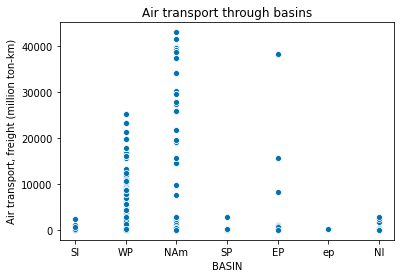

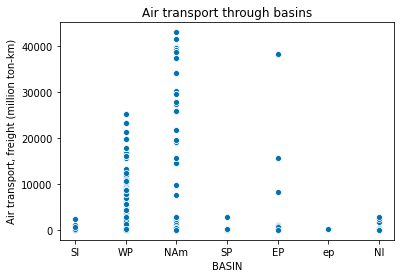

In [46]:
sns.scatterplot(x = df['BASIN'], y = df['Air transport, freight (million ton-km)'])
plt.title('Air transport through basins')
plt.show()

So, yep. When more Air transport resources the region of the basin occurs more damage we can conclude when we look at some graphics above the Air transport, condition cause more economic impact on their basins respective countries.

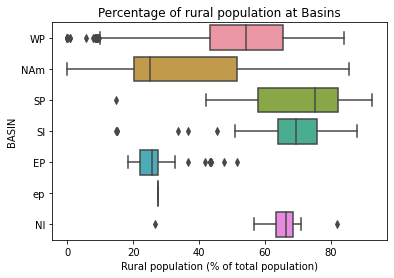

In [214]:
sns.boxplot(x = df['Rural population (% of total population)'], y= df['BASIN'])
plt.title("Percentage of rural population at Basins")
plt.show()

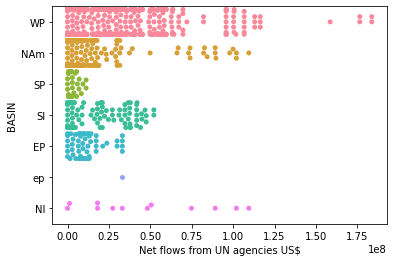

In [223]:
sns.swarmplot(x = df['Net flows from UN agencies US$'], y = df['BASIN'], size = 5)
plt.show()

## Working with GeoPandas

In [47]:
df['COORDS'][0]

'[[31.99, 130.68], [33.52, 130.97], [41.0, 140.5], [41.21, 141.38]]'

'[[31.99, 130.68], [33.52, 130.97], [41.0, 140.5], [41.21, 141.38]]'

In [0]:
#Separate the longitudes values

latitude = []
longitude = []
aux  = ''
latitude_flag = False
longitude_flag = False
for coordinates in df['COORDS']:
  #print(coordinates)
  for coord in coordinates:
    if coord != '[' and coord != ']':
      if coord != ',':
        aux += coord 
      elif coord == ',' and latitude_flag == False:
      #print(aux)
        latitude_val = float(aux)
        latitude.append(latitude_val)
        latitude_flag = True
        aux = ''
    elif coord == ']' and longitude_flag == False :
        strip_aux = aux.strip()
        longitude_val = float(strip_aux)
        longitude.append(longitude_val)
        longitude_flag = True

    else:   
      aux = ''
      longitude_flag = False
      latitude_flag = False



In [0]:
df['Latitudes'] = pd.Series(latitude)
df['Longitudes'] = pd.Series(longitude)

In [107]:
df.head()

,ID,NAME,ISO,Year,COORDS,BASIN,SUBBASIN,NATURE,ISO_TIME,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Total damage ('000$),CPI,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final,Total Affected,Latitudes,Longitudes
0,1,DELLA,JPN,1949,"[[31.99, 130.68], [33.52, 130.97], [41.0, 140....",WP,WP,ET,"['1949-06-20 15:00:00', '1949-06-20 18:00:00',...",12,0,12,-1,986.375000,21.50,40.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,Low,194046,31.99,130.68
1,2,JANE,JPN,1950,"[[34.94, 135.48], [36.1, 136.09], [37.27, 136....",WP,WP,TS,"['1950-09-03 03:00:00', '1950-09-03 06:00:00',...",21,0,21,0,973.500000,27.00,31.500000,99.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,Low,642117,33.52,130.97
2,3,CHARLIE,JAM,1951,"[[17.9, -76.9], [18.1, -77.8]]",NAm,NAm,TS,"['1951-08-18 03:00:00', '1951-08-18 06:00:00']",3,0,3,2,974.500000,16.50,284.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,56000.0,10.175534,NaN,0.100541,868.3,69.93,NaN,3796.219401,0.0,64.770000,NaN,152.453647,2.578304,66.231,Low,20200,41.00,140.50
3,4,AMY,PHL,1951,"[[10.73, 124.8], [10.53, 123.17], [10.68, 119....",WP,WP,TS,"['1951-12-09 12:00:00', '1951-12-09 21:00:00',...",12,0,12,2,961.333333,9.00,270.666667,119.200,20464826.0,1.880280e+11,12675908.0,1.131050e+11,5618193.0,4.897333e+10,NaN,10.175534,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,Low_Middle,60000,41.21,141.38
4,5,EMMA,PHL,1952,"[[10.47, 123.87], [10.65, 123.24], [10.83, 122...",WP,WP,TS,"['1952-07-02 12:00:00', '1952-07-02 15:00:00',...",9,8,1,0,983.500000,12.25,288.500000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,Low_Middle,103,34.94,135.48


In [120]:
#pip install geopandas

     |████████████████████████████████| 931kB 1.4MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 
     |████████████████████████████████| 10.4MB 42.9MB/s 


In [0]:
import geopandas


In [0]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitudes, df.Latitudes))

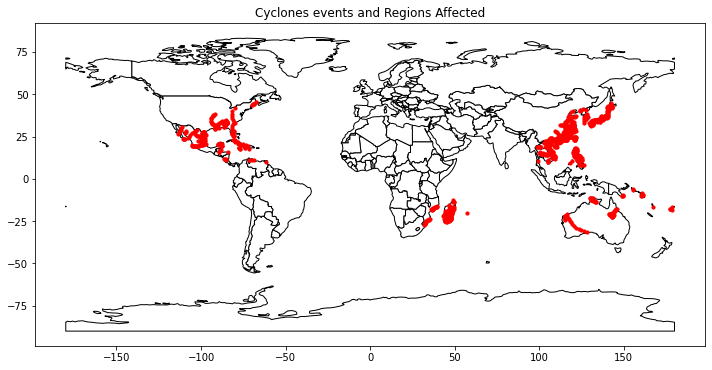

In [201]:
base = world.plot(color='white', edgecolor='black', figsize = (12,8))
gdf.plot(ax = base, color = 'red', legend= True, markersize=10);
plt.title("Cyclones events and Regions Affected")
plt.show()